# Installation Requirements

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-ibm-runtime

In [ ]:
pip install 'qiskit[visualization]'

In [ ]:
pip install qiskit-aer

In [ ]:
pip install --upgrade qiskit

In [ ]:
import qiskit

In [ ]:
#check the qiskit version
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.2', 'qiskit': '0.44.2', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Simple Quantum Circuit

In [ ]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Create a quantum circuit with three qubit
qc = QuantumCircuit(3)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(0, 1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
qc.cx(0, 2)

In [ ]:
qc.draw()
#qc.draw('mpl')

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [ ]:
# Create a simple quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to the qubit
qc.h(0)

# Measure the qubit
qc.measure_all()

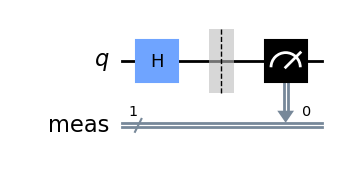

In [ ]:
#qc.draw()
qc.draw(output='mpl')

# Simulating circuits using Qiskit Aer

In [ ]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [ ]:
# Create a Quantum Program for execution
job = backend.run(qc)

In [ ]:
result = job.result()

In [ ]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


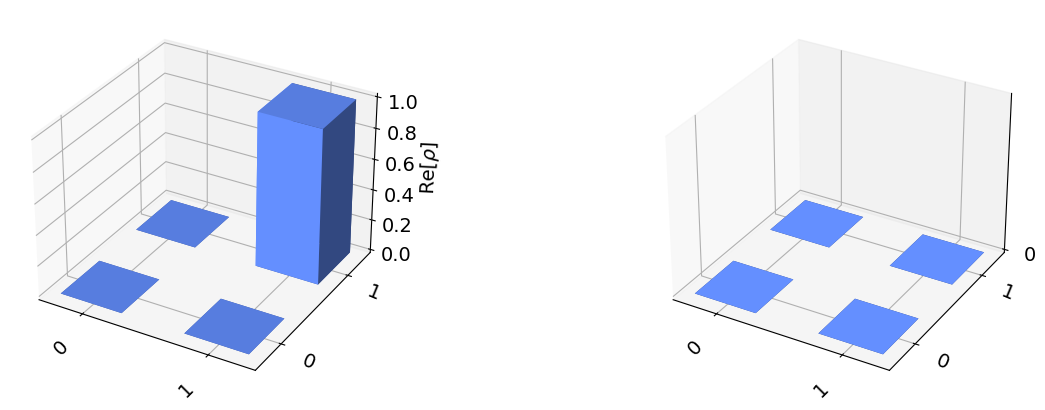

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [ ]:
# Create a quantum circuit with three qubit
qc = QuantumCircuit(3)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(0, 1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
qc.cx(0, 2)

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


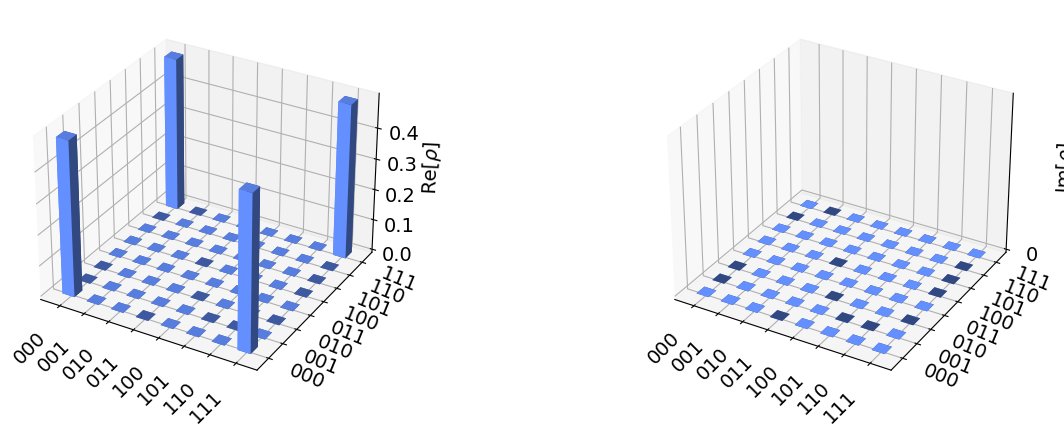

In [ ]:
plot_state_city(outputstate)

# Unitary backend

In [ ]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(qc)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

In [ ]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the compose method.
qc.add_register(meas.cregs[0])
qc = qc.compose(meas)

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [ ]:
from qiskit import transpile

In [ ]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [ ]:
counts = result_sim.get_counts(qc)
print(counts)

{'111': 543, '000': 481}


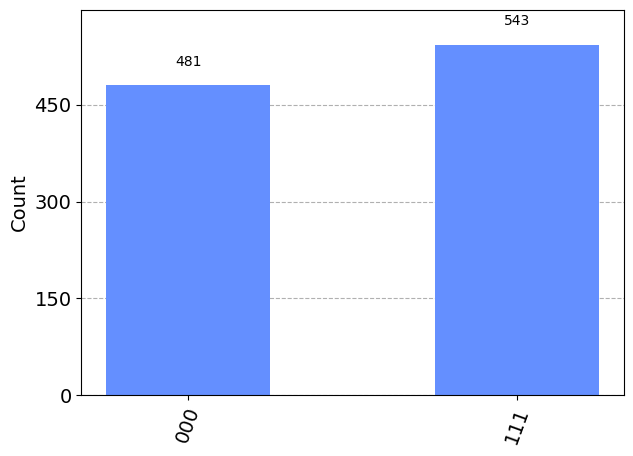

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)